# 1) Introduction

In this lesson, we'll learn how to handle missing data without having to drop rows and columns using data on motor vehicle collisions released by New York City and published on the [NYC OpenData website.](https://data.cityofnewyork.us/Public-Safety/Motor-Vehicle-Collisions-Crashes/h9gi-nx95)There is data on over 1.5 million collisions dating back to 2012, with additional data continuously added.

Our data set is in a CSV called nypd_mvc_2018.csv. We can read our data into a pandas dataframe and inspect the first few rows of the data:

In [2]:
import pandas as pd
import numpy as np
url = 'https://raw.githubusercontent.com/TomazFilgueira/Dq_Datascientist/refs/heads/main/04_Data_Cleaning/04_2_Advanced_data_cleaning/Data/nypd_mvc_2018.csv'
mvc = pd.read_csv(url, index_col=0)
mvc.head()

,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
unique_key,,,,,,,,,,,,,,,,,,,,,
3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3847947,2018-02-13,14:45,BROOKLYN,"(40.623714, -73.99314)",16 AVENUE,62 STREET,NaN,0,0,0,...,SPORT UTILITY / STATION WAGON,DS,NaN,NaN,NaN,Backing Unsafely,Unspecified,NaN,NaN,NaN
3914294,2018-06-04,0:00,NaN,"(40.591755, -73.9083)",BELT PARKWAY,NaN,NaN,0,0,1,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN
3915069,2018-06-05,6:36,QUEENS,"(40.73602, -73.87954)",GRAND AVENUE,VANLOON STREET,NaN,0,0,0,...,Sedan,Sedan,NaN,NaN,NaN,Glare,Passing Too Closely,NaN,NaN,NaN
3923123,2018-06-16,15:45,BRONX,"(40.884727, -73.89945)",NaN,NaN,208 WEST 238 STREET,0,0,0,...,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,Turning Improperly,Unspecified,NaN,NaN,NaN


A summary of the columns and their data is below:

* `unique_key`: A unique identifier for each collision.
* `date`, `time`: Date and time of the collision.
* `borough`: The borough, or area of New York City, where the collision occurred.
* `location`: Latitude and longitude coordinates for the collision.
* `on_street`, `cross_street`, `off_street`: Details of the street or intersection where the collision occurred.
* `pedestrians_injured`: Number of pedestrians who were injured.
* `cyclist_injured`: Number of people traveling on a bicycle who were injured.
* `motorist_injured`: Number of people traveling in a vehicle who were injured.
* `total_injured`: Total number of people injured.
* `pedestrians_killed`: Number of pedestrians who were killed.
* `cyclist_killed`: Number of people traveling on a bicycle who were killed.
* `motorist_killed`: Number of people traveling in a vehicle who were killed.
* `total_killed`: Total number of people killed.
* `vehicle_1` through `vehicle_5`: Type of each vehicle involved in the accident.
* `cause_vehicle_1` through `cause_vehicle_5`: Contributing factor for each vehicle in the accident.

## Example - Counting missing values

In [3]:
data = np.random.choice([1.0, np.nan],
                        size=(3, 3),
                        p=[0.3, 0.7])
df = pd.DataFrame(data, columns=['A','B','C'])
print(df)

print(df.isnull())

     A   B   C
0  1.0 NaN NaN
1  1.0 NaN NaN
2  1.0 NaN NaN
       A     B     C
0  False  True  True
1  False  True  True
2  False  True  True


In [4]:
#We can chain the result to DataFrame.sum() method to count the number of null values in each column
print(df.isnull().sum())

A    0
B    3
C    3
dtype: int64


## Instructions
We have read the CSV file into a pandas dataframe called mvc.

Create a series that counts the number of null values in each of the columns in the `mvc` dataframe. Assign the result to `null_counts`.

In [5]:
null_counts = mvc.isnull().sum()
null_counts

date                       0
time                       0
borough                20646
location                3885
on_street              13961
cross_street           29249
off_street             44093
pedestrians_injured        0
cyclist_injured            0
motorist_injured           0
total_injured              1
pedestrians_killed         0
cyclist_killed             0
motorist_killed            0
total_killed               5
vehicle_1                355
vehicle_2              12262
vehicle_3              54352
vehicle_4              57158
vehicle_5              57681
cause_vehicle_1          175
cause_vehicle_2         8692
cause_vehicle_3        54134
cause_vehicle_4        57111
cause_vehicle_5        57671
dtype: int64

# 2) Verifying the Total Columns

To give us a better picture of the null values in the data, let's calculate the percentage of null values in each column. Below, we **divide** the number of null values in each column by the **total number of values** in the data set.

We'll then add both the `counts` and `percentages` to a dataframe to make them easier to compare:

In [6]:
null_counts_pct = null_counts / mvc.shape[0] * 100

null_df = pd.DataFrame({'null_counts': null_counts, 'null_pct': null_counts_pct})
# Rotate the dataframe so that rows become columns and vice-versa
null_df = null_df.T.astype(int)
null_df

,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
null_counts,0,0,20646,3885,13961,29249,44093,0,0,0,...,355,12262,54352,57158,57681,175,8692,54134,57111,57671
null_pct,0,0,35,6,24,50,76,0,0,0,...,0,21,93,98,99,0,15,93,98,99


To make things easier, let's start by looking at the group of columns that relate to people **killed in collisions**.

We'll use list comprehension to reduce our summary dataframe to just those columns:

In [7]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
print(null_df[killed_cols])

             pedestrians_killed  cyclist_killed  motorist_killed  total_killed
null_counts                   0               0                0             5
null_pct                      0               0                0             0


We can see that each of the individual categories have no missing values, but the `total_killed` column has **five** missing values.

The total number of people killed should be the **sum** of each of the individual categories. We might be able to "fill in" the missing values with the sums of the individual columns for that row. The technical name for filling in a missing value with a replacement value is called **imputation**.

Let's look at how we could explore the values where the `total_killed` **isn't equal** to the sum of the other three columns. 

Select just the first three columns, and manually sum each row:
![Alt text](https://s3.amazonaws.com/dq-content/370/verify_totals_2.svg)

We then compare the **manual sum** to the original `total` column to create a boolean `mask` where equivalent values **are not equal**:

![Alt text](https://s3.amazonaws.com/dq-content/370/verify_totals_3.svg)

Lastly, we use the boolean mask to filter the original dataframe to include only rows where the manual sum and original **aren't equal**:

![Alt text](https://s3.amazonaws.com/dq-content/370/verify_totals_4.svg)

## Instructions

We created a dataframe `killed`, containing the five columns that relate to people killed in collisions.

1. Select the first three columns from `killed` and sum each row. Assign the result to `killed_manual_sum`.

1. Create a boolean mask that checks whether each value in `killed_manual_sum` is not equal to the values in the `total_killed` column. Assign the boolean mask to `killed_mask`.

1. Use `killed_mask` to filter the rows in `killed`. Assign the result to `killed_non_eq`.


In [8]:
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()

killed_manual_sum = killed.iloc[:,:3].sum(axis=1)
killed_mask = killed_manual_sum != killed['total_killed']

#identifying columns that sum does not match with total sum
killed_non_eq = killed[killed_mask]
killed_non_eq


,pedestrians_killed,cyclist_killed,motorist_killed,total_killed
unique_key,,,,
4026451,0,0,0,NaN
4028365,0,0,0,NaN
4026317,0,0,1,0.0
4026219,0,0,0,NaN
4026434,0,0,0,NaN
4026403,0,0,0,NaN


# 3) Filling and Verifying the Killed and Injured 

We can categorize the dataframde into two categories:

1. Five rows where the `total_killed` is not equal to the sum of the other columns because the total value is missing.

1.One row where the `total_killed` is less than the sum of the other columns.

From this, we can conclude that filling null values with the sum of the columns is a fairly good choice for our **imputation**.

In order to execute this, we'll learn to use the `Series.mask()` method. `Series.mask()` is useful when you want to replace certain values in a series based off a boolean mask. The syntax for the method is:

```
Series.mask(bool_mask, val_to_replace)
```



## Example:

Let's look at an example with some simple data. We'll start with a series called `fruits`:

![Alt text](https://s3.amazonaws.com/dq-content/370/mask_1.svg)

Next, we create a boolean series that matches values equal to the string `Banana`:

![Alt text](https://s3.amazonaws.com/dq-content/370/mask_2.svg)

Lastly, we use `Series.mask()` to replace all the values that match the boolean series with a new value, `Pear`

![Alt text](https://s3.amazonaws.com/dq-content/370/mask_3.svg)



Let's look at how we'd use this technique to update the values in the `total_killed` column. First, we'll replace all `null` values with the equivalent values from our `killed_manual_sum` series:

In [9]:
killed_null = killed['total_killed'].isnull()
killed['total_killed'] = killed['total_killed'].mask(killed_null, killed_manual_sum)

Next, we'll replace any values where the **manual sum** and the **total column** **aren't equal** with np.nan. This time we'll define the boolean series directly into `Series.mask()`:

In [10]:
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)
print(killed[killed_mask])

            pedestrians_killed  cyclist_killed  motorist_killed  total_killed
unique_key                                                                   
4026451                      0               0                0           0.0
4028365                      0               0                0           0.0
4026317                      0               0                1           NaN
4026219                      0               0                0           0.0
4026434                      0               0                0           0.0
4026403                      0               0                0           0.0


We've gone from five null values to **one**, and flagged some suspicious data. Let's do the same for the `injured` columns.

## Instructions

1. Use `Series.mask()` to replace any **null** values from the `total_injured` column with their equivalents from the `injured_manual_sum` series.

1. Use `Series.mask()` to replace any **numbers** from `total_injured` that aren't equal to their equivalents in `injured_manual_sum` with np.nan.

In [11]:
# Create a killed dataframe and manually sum values
killed_cols = [col for col in mvc.columns if 'killed' in col]
killed = mvc[killed_cols].copy()
killed_manual_sum = killed.iloc[:, :3].sum(axis=1)

# fix the killed values
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'].isnull(), killed_manual_sum)
killed['total_killed'] = killed['total_killed'].mask(killed['total_killed'] != killed_manual_sum, np.nan)

# Create an injured dataframe and manually sum values
injured = mvc[[col for col in mvc.columns if 'injured' in col]].copy()
injured_manual_sum = injured.iloc[:, :3].sum(axis=1)

#identifyin null values in injured
injured_null = injured['total_injured'].isnull()

injured['total_injured'] = injured['total_injured'].mask(injured_null, injured_manual_sum)

injured['total_injured'] = injured['total_injured'].mask(injured['total_injured'] != injured_manual_sum,np.nan)

print(injured['total_injured'].isnull().sum())



21


# 4 Assigning the Corrected Data Back to the Main Dataframe

Let's summarize the count of null values before and after our changes:

In [12]:
summary = {
    'injured': [
        mvc['total_injured'].isnull().sum(),
        injured['total_injured'].isnull().sum()
    ],
    'killed': [
        mvc['total_killed'].isnull().sum(),
        killed['total_killed'].isnull().sum()
    ]
}
print(pd.DataFrame(summary, index=['before','after']))

        injured  killed
before        1       5
after        21       1


For the `total_killed` column, the number of values has **gone down from 5 to 1**. For the `total_injured` column, the number of values has actually **gone up — from 1 to 21**. This might sound like we've done the opposite of what we set out to do, but what we've actually done is **fill all the null values** and identify values that have suspect data. This will make any analysis we do on this data more accurate in the long run.

## Instructions

Let's assign the values from the `killed` and injured `dataframe` back to the main `mvc` dataframe:

In [13]:
mvc['total_injured'] = injured['total_injured']
mvc['total_killed'] = killed['total_killed']
                        

# 5 Visualizing Missing Data with Plots

The function below uses `seaborn.heatmap()` to represent null values as **light** squares and non-null values as **dark squares**:

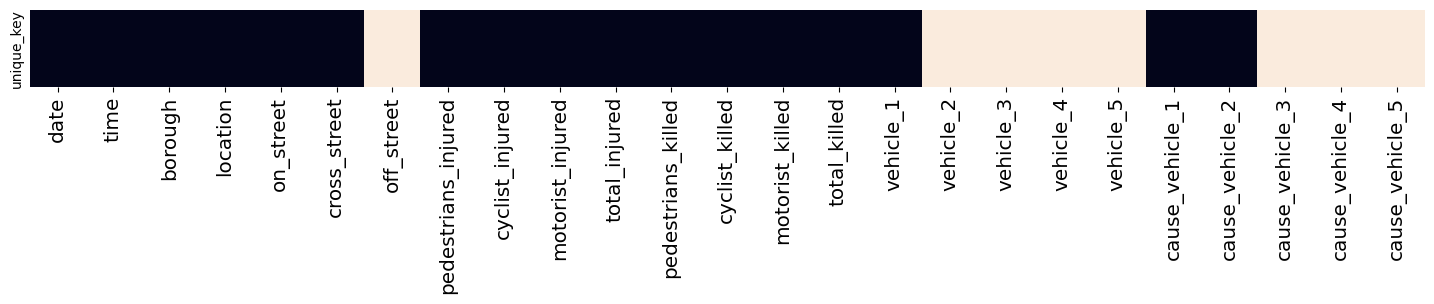

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns


def plot_null_matrix(df, figsize=(18,15)):
    # initiate the figure
    plt.figure(figsize=figsize)
    # create a boolean dataframe based on whether values are null
    df_null = df.isnull()
    # create a heatmap of the boolean dataframe
    sns.heatmap(df_null, cbar=False, yticklabels=False)
    plt.xticks(rotation=90, size='x-large')
    plt.show()

#We'll display the first row of MVC
plot_null_matrix(mvc.head(1), figsize=(18,1))

Each value is represented by a dark square, and each missing value is represented by a light square.

In [16]:
mvc.head(1)

,date,time,borough,location,on_street,cross_street,off_street,pedestrians_injured,cyclist_injured,motorist_injured,...,vehicle_1,vehicle_2,vehicle_3,vehicle_4,vehicle_5,cause_vehicle_1,cause_vehicle_2,cause_vehicle_3,cause_vehicle_4,cause_vehicle_5
unique_key,,,,,,,,,,,,,,,,,,,,,
3869058,2018-03-23,21:40,MANHATTAN,"(40.742832, -74.00771)",WEST 15 STREET,10 AVENUE,NaN,0,0,0,...,PASSENGER VEHICLE,NaN,NaN,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN


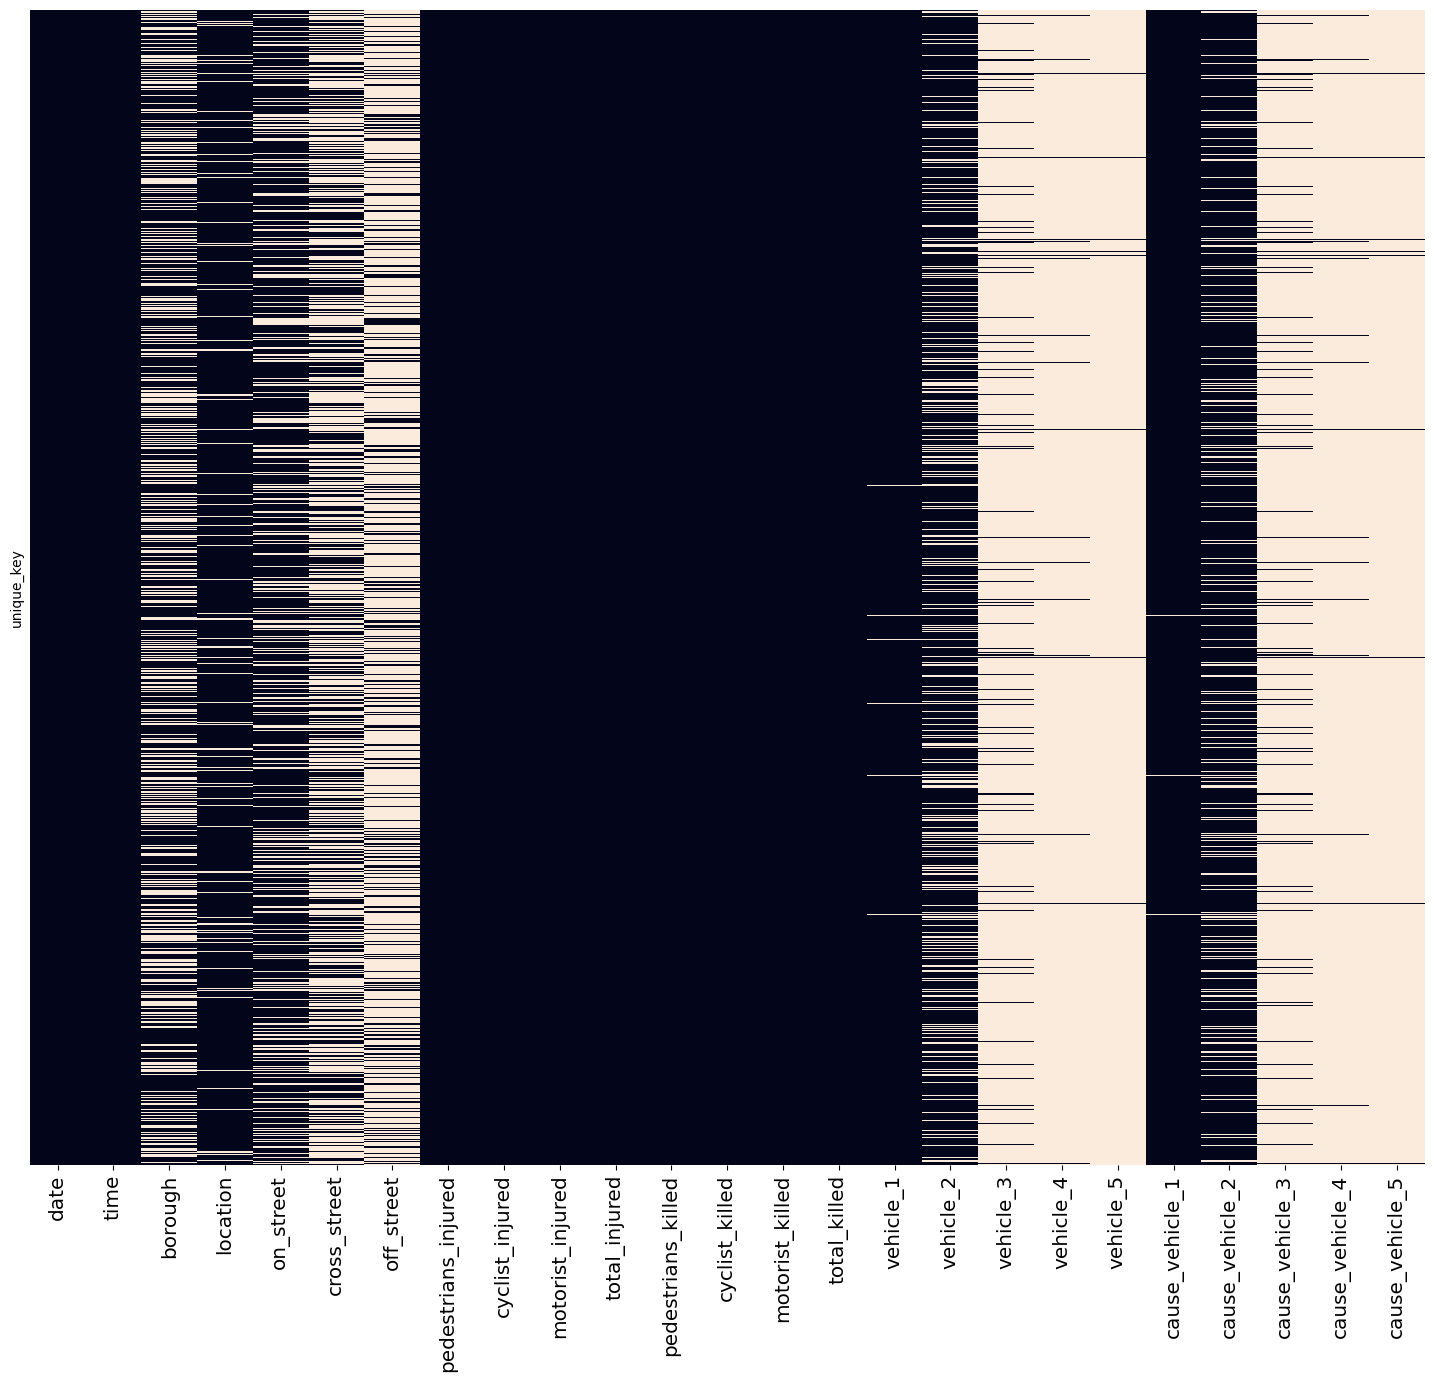

In [17]:
plot_null_matrix(mvc)

We can make some immediate interpretations about our dataframe:

* The **first three columns** have few to no missing values.
* The **next five columns** have missing values scattered throughout, with each column seeming to have its own density of missing values.
* The **next eight columns** are the injury and killed columns we just cleaned, and only have a few missing values.
* The **last 10 columns** seem to break into two groups of five, with each group of five having similar patterns of null/non-null values.

Let's examine the pattern in the last 10 columns a little more closely. We can calculate the relationship between two sets of columns, known as correlation. To calculate this we use the `dataframe.corr()` method

In [18]:
cols_with_missing_vals = mvc.columns[mvc.isnull().sum() > 0]
missing_corr = mvc[cols_with_missing_vals].isnull().corr()
print(missing_corr)

                  borough  location  on_street  cross_street  off_street  \
borough          1.000000  0.190105  -0.350190      0.409107    0.362189   
location         0.190105  1.000000  -0.073975     -0.069719    0.084579   
on_street       -0.350190 -0.073975   1.000000      0.557767   -0.991030   
cross_street     0.409107 -0.069719   0.557767      1.000000   -0.552763   
off_street       0.362189  0.084579  -0.991030     -0.552763    1.000000   
total_injured   -0.002827 -0.001486   0.006220      0.002513   -0.004266   
total_killed     0.005582  0.015496  -0.002344      0.004112    0.002323   
vehicle_1       -0.018325 -0.010466  -0.001889     -0.017018    0.001812   
vehicle_2       -0.077516 -0.033842   0.119647      0.043799   -0.121129   
vehicle_3       -0.061932 -0.000927   0.020867     -0.049910   -0.022404   
vehicle_4       -0.020406  0.004655   0.004172     -0.021137   -0.004074   
vehicle_5       -0.010733 -0.005797  -0.002768     -0.012003    0.002492   
cause_vehicl

## Instructions

It's been created a function, `plot_null_correlations()`, which will plot correlations between null values in a dataframe.

1. Use list comprehension to produce a list of column names containing the substring `'vehicle'`.

1. Use the list of column names to select only those columns from the mvc dataframe. Pass the result to the `plot_null_correlations()` function.

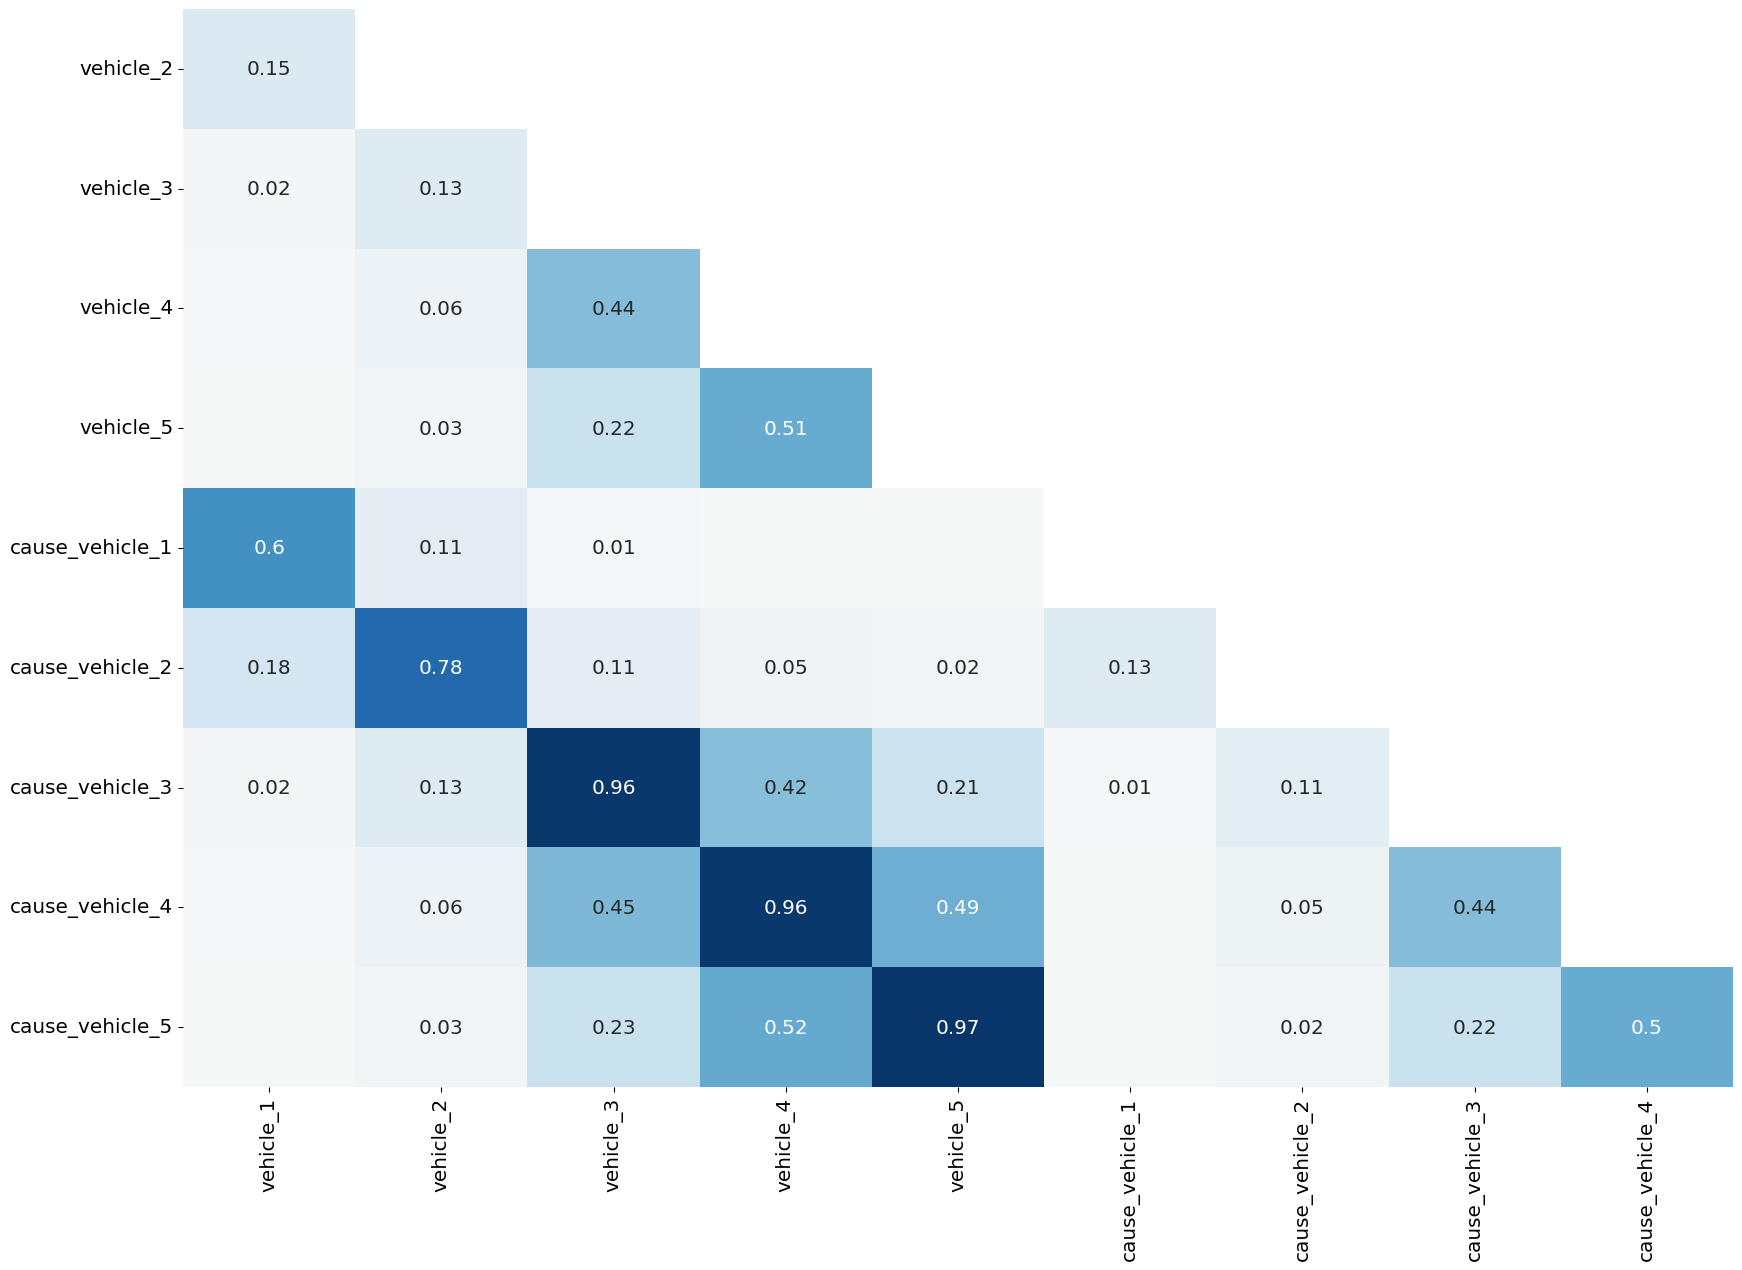

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_null_correlations(df):
    # create a correlation matrix only for columns with at least
    # one missing value
    cols_with_missing_vals = df.columns[df.isnull().sum() > 0]
    missing_corr = df[cols_with_missing_vals].isnull().corr()
    
    # create a mask to avoid repeated values and make
    # the plot easier to read
    missing_corr = missing_corr.iloc[1:, :-1]
    mask = np.triu(np.ones_like(missing_corr), k=1)
    
    # plot a heatmap of the values
    plt.figure(figsize=(20,14))
    ax = sns.heatmap(missing_corr, vmin=-1, vmax=1, cbar=False,
                     cmap='RdBu', mask=mask, annot=True)
    
    # format the text in the plot to make it easier to read
    for text in ax.texts:
        t = float(text.get_text())
        if -0.05 < t < 0.01:
            text.set_text('')
        else:
            text.set_text(round(t, 2))
        text.set_fontsize('x-large')
    plt.xticks(rotation=90, size='x-large')
    plt.yticks(rotation=0, size='x-large')

    plt.show()

mask_vehicle = [col for col in mvc.columns if 'vehicle' in col]

plot_null_correlations(mvc[mask_vehicle])

# 6  Analyzing Correlations in Missing Data

 The pairs of column names that make up these five correlations are:

1. `vehicle_1` and `cause_vehicle_1`
1. `vehicle_2` and `cause_vehicle_2`
1. `vehicle_3` and `cause_vehicle_3`
1. `vehicle_4` and `cause_vehicle_4`
1. `vehicle_5` and `cause_vehicle_5`

Let's explore the variations in missing values from these five pairs of columns. We'll create a dataframe that counts, for each pair:

* The number of values where the **vehicle is missing** when the **cause is not missing**.
* The number of values where the **cause is missing** when the **vehicle is not missing**.

## Instructions

1. Add code to the body of the loop that will:

    * Count the number of rows where the `v_col` column is null and the `c_col` column is not null. Assign the result to `v_null`.

    * Count the number of rows where the `c_col` column is null and the `v_col` column is not null. Assign the result to `c_null`.

    * Append an item to the `vc_null_data` list. The item should be a list containing, in order: v, `v_null`, `c_null`.

1. Outside the loop, create a dataframe using the vc_null_data list of lists.

    * Use the `columns` parameter and the `col_labels` list to set the column names of the dataframe.
    * Assign the dataframe to `vc_null_df`.
